## Plant Seedling Image classification with Convolutional Neural Networks

####Kaggle Data Set "Plant Seedlings Classification"
https://www.kaggle.com/c/plant-seedlings-classification


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import sys
sys.version

'3.6.6 (default, Sep 12 2018, 18:26:19) \n[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]'

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /root/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /root/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 12.5 GB  | Proc size: 665.0 MB
GPU RAM Free: 11325MB | Used: 116MB | Util   1% | Total 11441MB


In [6]:
#DATASET_ZIP_FILE = 'fruits.zip'
#from zipfile import ZipFile
#files = os.listdir()
#if not DATASET_ZIP_FILE in files:
  
#  !curl --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:63.0) Gecko/20100101 Firefox/63.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --cookie '_ga=GA1.3.597929118.1540370868' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-datasets/5857/94583/fruits.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1543353373&Signature=rfXrXBZSWzulX89wVMZDAe94oaVLEUrANf5DzrxnaezszFEgWrtoWzGeDjVDStAn3jdczeSknwH5uS%2BJ8Q6QJLiEqoFcB2iM0LANrl6cc6RWXynmI0NxIUqhFeL%2BngeQF1eFNivl4aCKBZDsqW7%2BtIPAWyfpcBvXKP0ACgmnJt%2Fb%2BUe7NnLWZ9c353YPK4msQAvM5H5c40kXAzYX9er6XpX7HOTUkY%2FXrVhNhmuiorDFERNHhdzmBHepDJRRhY5x34NXw3z0pk6Rn7aToBh9yqNQ8aQDeekNrBDQky9KahJmupA5DpjdK76vA3jKX29Cw%2FnAdj9w7GyKiIZ1iYtm8g%3D%3D' --output 'fruits.zip'  #The first step is install kaggle
#'''
  !pip install kaggle
  from google.colab import files
  files.upload()
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  #this permissions change avoids a warnong on Kaggle tool startup
  !chmod 600 ~/.kaggle/kaggle.json  
  #!kaggle datasets download -d moltean/fruits
  !kaggle competitions download -c kkbox-music-recommendation-challenge
#'''
  !ls
#  with ZipFile(DATASET_ZIP_FILE, 'r') as zipF:
#    zipF.extractall()
#    print('UnZip Done')

Saving kaggle.json to kaggle.json
  0% 0.00/453k [00:00<?, ?B/s]
100% 453k/453k [00:00<00:00, 61.8MB/s]
  0% 0.00/1.29M [00:00<?, ?B/s]
100% 1.29M/1.29M [00:00<00:00, 42.6MB/s]
 79% 33.0M/41.9M [00:01<00:01, 6.83MB/s]
100% 41.9M/41.9M [00:01<00:00, 22.9MB/s]
 88% 89.0M/101M [00:01<00:00, 33.3MB/s]
100% 101M/101M [00:02<00:00, 52.3MB/s] 
 88% 89.0M/101M [00:01<00:00, 36.7MB/s]
100% 101M/101M [00:02<00:00, 51.4MB/s] 
 90% 89.0M/98.8M [00:01<00:00, 47.8MB/s]
100% 98.8M/98.8M [00:01<00:00, 61.3MB/s]
kaggle.json	sample_data		  song_extra_info.csv.7z  test.csv.7z
members.csv.7z	sample_submission.csv.7z  songs.csv.7z		  train.csv.7z


In [7]:
!ls
from google.colab import files
#for file in files:
#  print(file)


kaggle.json	sample_data		  song_extra_info.csv.7z  test.csv.7z
members.csv.7z	sample_submission.csv.7z  songs.csv.7z		  train.csv.7z


In [0]:
#!rm kaggle.json

In [0]:
files.download('test.csv.7z') 

In [0]:
files.download('members.csv.7z') 

In [0]:
files.download('sample_submission.csv.7z') 

In [8]:
files.download('songs.csv.7z') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 36784, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
files.download('train.csv.7z') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 57752, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
!pip uninstall fastai
!pip install fastai==0.7.0

Uninstalling fastai-1.0.14:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/fastai-1.0.14.dist-info/*
    /usr/local/lib/python3.6/dist-packages/fastai/*
Proceed (y/n)? y
  Successfully uninstalled fastai-1.0.14
    100% |████████████████████████████████| 122kB 3.7MB/s 
    100% |████████████████████████████████| 71kB 25.7MB/s 
    100% |████████████████████████████████| 496.4MB 30kB/s 
    100% |████████████████████████████████| 122kB 23.0MB/s 
    100% |████████████████████████████████| 184kB 28.8MB/s 
    100% |████████████████████████████████| 1.5MB 4.6MB/s 
    100% |████████████████████████████████| 3.6MB 6.0MB/s 
    100% |████████████████████████████████| 92kB 26.8MB/s 
    100% |████████████████████████████████| 61kB 22.6MB/s 
    100% |████████████████████████████████| 11.6MB 2.6MB/s 
    100% |████████████████████████████████| 81kB 19.3MB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / 

In [0]:
!pip install Pillow==4.1.1

In [0]:
!pip uninstall torch torchvision --yes
!pip install torch==0.3.1 torchvision

Uninstalling torch-0.4.0:
  Successfully uninstalled torch-0.4.0
Uninstalling torchvision-0.2.1:
  Successfully uninstalled torchvision-0.2.1
  Using cached https://files.pythonhosted.org/packages/5b/a5/e8b50b55b1abac9f1e3346c4242f1e42a82d368a8442cbd50c532922f6c4/torch-0.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ca/0d/f00b2885711e08bd71242ebe7b96561e6f6d01fdb4b9dcf4d37e2e13c5e1/torchvision-0.2.1-py2.py3-none-any.whl


In [0]:
!apt update && apt install -y libsm6 libxext6

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [237 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [536 kB]
Get:14 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1

In [0]:
!pip install -q -U opencv-python

In [0]:
import torch
print(torch.__version__)

0.4.1


It's important that you have a working NVidia GPU set up. The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. Therefore, you need to ensure the following line returns `True` before you proceed. If you have problems with this, please check the FAQ and ask for help on [the forums](http://forums.fast.ai).

In [0]:
torch.cuda.is_available()

True

In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return `True`, you may want to look into why.

In [0]:
torch.backends.cudnn.enabled

True

## Loading Plant Seedling Data from Google Drive

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages.
* Black-grass
* Charlock
* Cleavers
* Common Chickweed
* Common wheat
* Fat Hen
* Loose Silky-bent
* Maize
* Scentless Mayweed
* Shepherds Purse
* Small-flowered Cranesbill
* Sugar beet



In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need. We'll learn about what each does during the course.

In [0]:
!pip install PyDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

    100% |████████████████████████████████| 993kB 19.6MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls drive/'My Drive'/data/PlantSeedlings

'Plant Seedlings Classification | Kaggle.desktop'   test
'sample_submission (copy).csv'			    train
 sample_submission.csv


Get Plant Seedling dataset

In [0]:
PATH = "drive/My Drive/data/PlantSeedlings/"
#PATH = "drive/My Drive/Colab Notebooks/data/testBin/"
sz=224

In [0]:
from os.path import join
image_dir = f'{PATH}train/'

In [0]:
!ls '{image_dir}'

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [0]:
import fastai as fai

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

## First look at cat pictures

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize

In [0]:
os.listdir(PATH)

['sample_submission (copy).csv',
 'Plant Seedlings Classification | Kaggle.desktop',
 'sample_submission.csv',
 'train',
 'test']

In [0]:
#files = os.listdir(f'{PATH}/train/Cleavers')[:5]
files = os.listdir(f'{PATH}train/Maize')[:5]
files

['a6e44df4f.png',
 '006196e1c.png',
 'c05a8d7e1.png',
 'b8b2658d9.png',
 '8d2004e7a.png']

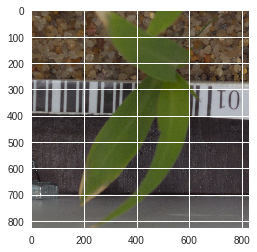

In [0]:
img = plt.imread(f'{PATH}train/Maize/{files[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [0]:
img.shape

(826, 826, 3)

In [0]:
img[:4,:4]

array([[[0.43922, 0.36863, 0.27059],
        [0.41961, 0.35686, 0.2549 ],
        [0.39608, 0.33725, 0.23137],
        [0.40392, 0.34118, 0.23529]],

       [[0.42353, 0.3451 , 0.24314],
        [0.41569, 0.34902, 0.24706],
        [0.41961, 0.36078, 0.25882],
        [0.41176, 0.35686, 0.2549 ]],

       [[0.40784, 0.32941, 0.22353],
        [0.41176, 0.3451 , 0.24314],
        [0.40392, 0.34902, 0.24314],
        [0.4    , 0.3451 , 0.24314]],

       [[0.41569, 0.3451 , 0.23529],
        [0.40784, 0.3451 , 0.23922],
        [0.4    , 0.3451 , 0.23922],
        [0.39608, 0.3451 , 0.24314]]], dtype=float32)

In [0]:
import os
for root, dirs, files in os.walk(f'{PATH}train'):
  print(dirs)
  break;
CATEGORIES = dirs

['Maize', 'Sugar beet', 'Common wheat', 'Loose Silky-bent', 'Charlock', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Common Chickweed', 'Cleavers', 'Black-grass', 'Fat Hen', 'Scentless Mayweed']


In [0]:
print(os.path.isdir(f'{PATH}valid/'))

False


In [0]:
# split train dataset into training 80% and validation 20%
import random
import shutil
if not os.path.isdir(f'{PATH}valid/'):
  # make dir and mv
  os.mkdir(f'{PATH}valid/')
  for category in CATEGORIES:
      os.mkdir(f'{PATH}valid/' + category)
      name = os.listdir(f'{PATH}train/' + category)
      random.shuffle(name)
      todev = name[:int(len(name) * .2)]
      for file in todev:
          shutil.move(os.path.join(f'{PATH}train/', category, file), os.path.join(f'{PATH}valid/', category))

In [0]:
os.listdir(PATH)


['test', 'sample_submission.csv', 'train', 'valid']

In [0]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
image_size = 224

In [0]:
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

In [0]:
from tensorflow.python.keras.applications import ResNet50
#my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
my_model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 1s 0us/step


In [0]:
image_dir = f'{PATH}train'
img_paths = [join(image_dir, filename) for filename in 
                           ['0246f44bb123ce3f91c939861eb97fb7.jpg',
                            '84728e78632c0910a69d33f82e62638c.jpg',
                            '8825e914555803f4c67b26593c9d5aff.jpg',
                            '91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']]

In [0]:
img_paths

['drive/My Drive/Colab Notebooks/data/PlantSeedlings/train/0246f44bb123ce3f91c939861eb97fb7.jpg',
 'drive/My Drive/Colab Notebooks/data/PlantSeedlings/train/84728e78632c0910a69d33f82e62638c.jpg',
 'drive/My Drive/Colab Notebooks/data/PlantSeedlings/train/8825e914555803f4c67b26593c9d5aff.jpg',
 'drive/My Drive/Colab Notebooks/data/PlantSeedlings/train/91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']

In [0]:
test_data = read_and_prep_images(img_paths)

FileNotFoundError: ignored

In [0]:
preds = my_model.predict(test_data)


In [0]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

In [0]:
data.val_y

In [0]:
data.classes

['Maize', 'SugarBeet']

In [0]:
log_preds = learn.predict()
log_preds.shape

(200, 2)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


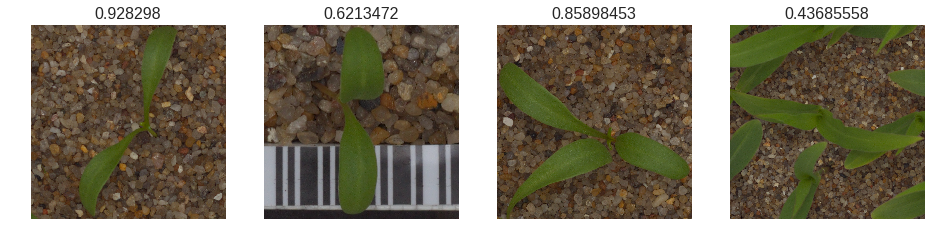

In [0]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


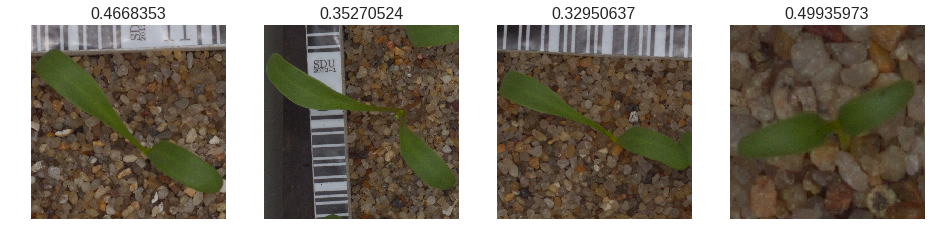

In [0]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct Maize


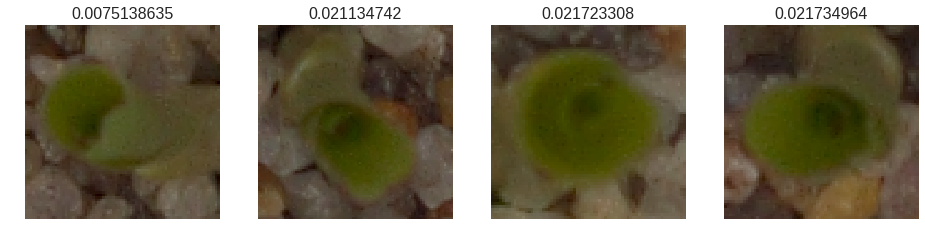

In [0]:
plot_val_with_title(most_by_correct(0, True), "Most correct Maize")

Most correct Sugar Beet


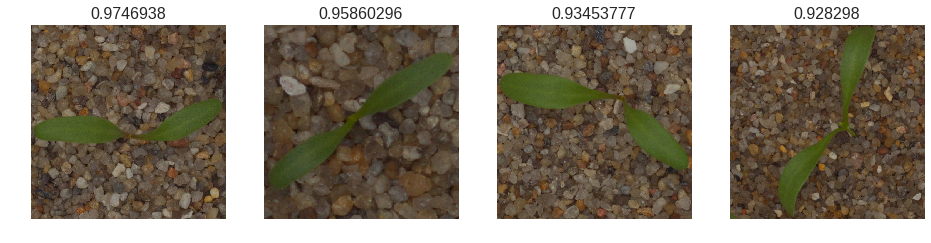

In [0]:
plot_val_with_title(most_by_correct(1, True), "Most correct Sugar Beet")

Most incorrect Maize


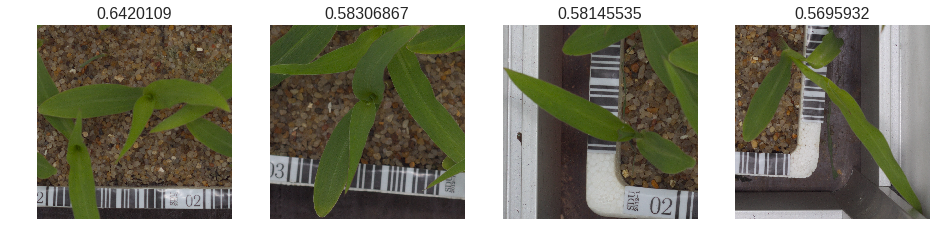

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect Maize")

Most incorrect Sugar Beets


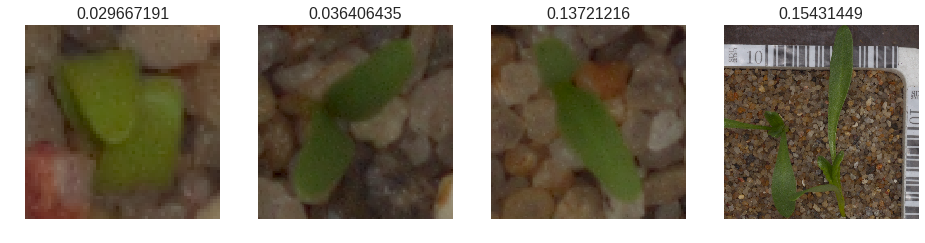

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect Sugar Beets")

Most uncertain predictions


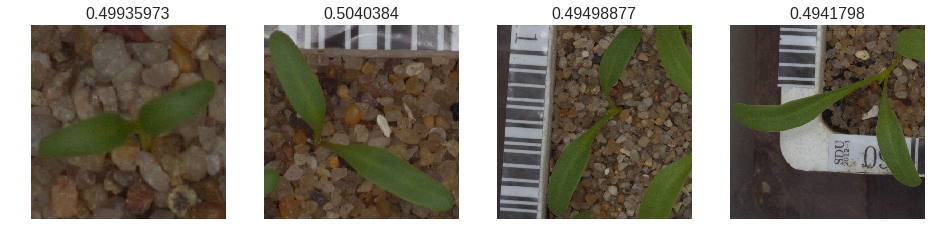

In [0]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a *Plant Seedlings* model in 3 lines of code, and under 20 seconds:

In [0]:
classes = os.listdir(f'{PATH}/train')
print("Class Total Count: ", len(classes))
print(classes)

Class Total Count:  12
['Sugar beet', 'Maize', 'Common wheat', 'Loose Silky-bent', 'Charlock', 'Cleavers', 'Shepherds Purse', 'Common Chickweed', 'Fat Hen', 'Scentless Mayweed', 'Black-grass', 'Small-flowered Cranesbill']


In [0]:
import pandas as pd
import numpy as np

all_images_class = [os.listdir(f'{PATH}/train/'+c) for c in classes]
int_to_classes = {i:classes[i] for i in range(len(classes))}
classes_to_int = {classes[i]:i for i in range(len(classes))}
print("array shape: ", all_images_class.shape)h
int_to_classes

AttributeError: ignored

In [0]:
df = pd.DataFrame({"n_images": [len(x) for x in all_images_class]}, index=classes)
df.index.name = "Specie"


12

In [0]:
my_dict = {"image_countc": [len(x) for x in all_images_class]}
my_dict

{'n_images': [385, 221, 221, 654, 390, 287, 231, 611, 475, 516, 263, 496]}

In [0]:
[len(x) for x in all_images_class]

[385, 221, 221, 654, 390, 287, 231, 611, 475, 516, 263, 496]

How good is this model? Well, as we mentioned, prior to this competition, the state of the art was 80% accuracy. But the competition resulted in a huge jump to 98.9% accuracy, with the author of a popular deep learning library winning the competition. Extraordinarily, less than 4 years later, we can now beat that result in seconds! Even last year in this same course, our initial model had 98.3% accuracy, which is nearly double the error we're getting just a year later, and that took around 10 minutes to compute.

## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (i.e. those with highest probability that are correct)
4. The most incorrect labels of each class (i.e. those with highest probability that are incorrect)
5. The most uncertain labels (i.e. those with probability closest to 0.5).

In [0]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['Maize', 'SugarBeet']

In [0]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(200, 2)

In [0]:
log_preds[:10]

array([[-0.04739, -3.07297],
       [-0.07716, -2.60021],
       [-0.10747, -2.28381],
       [-0.03282, -3.43308],
       [-0.02585, -3.66825],
       [-0.15202, -1.95876],
       [-0.12755, -2.12233],
       [-0.24693, -1.51957],
       [-0.06089, -2.82898],
       [-0.04394, -3.1468 ]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


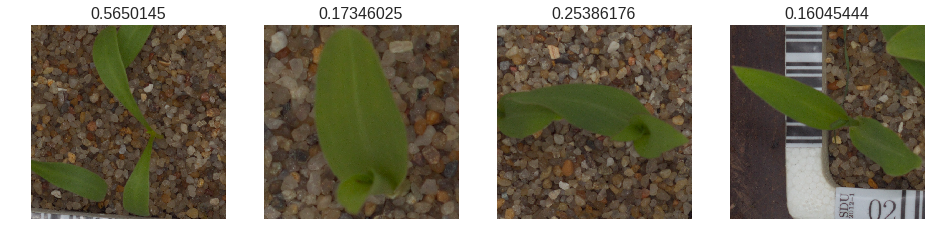

In [0]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


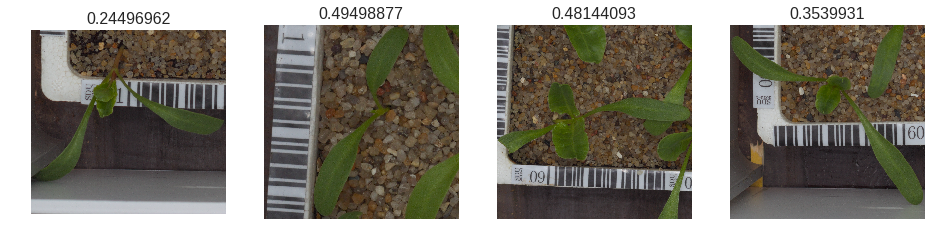

In [0]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


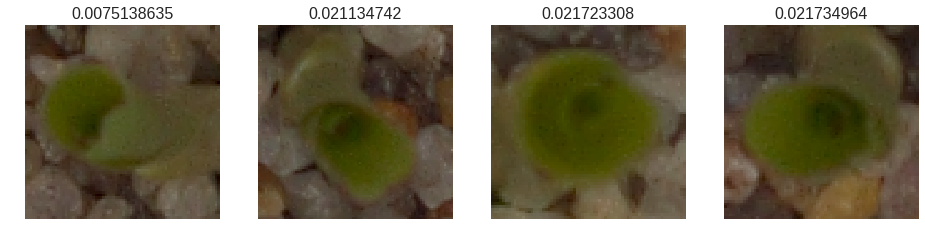

In [0]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


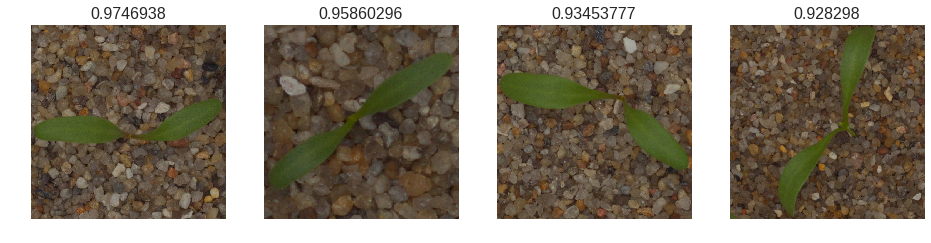

In [0]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


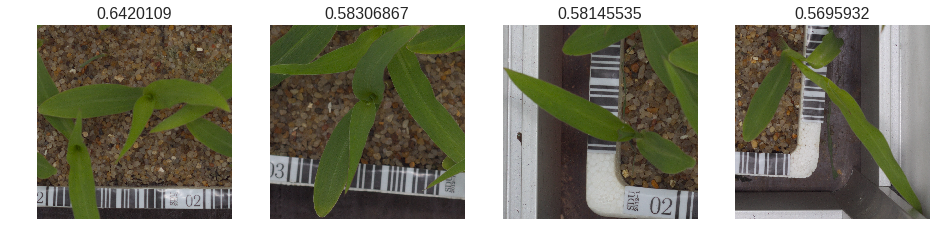

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


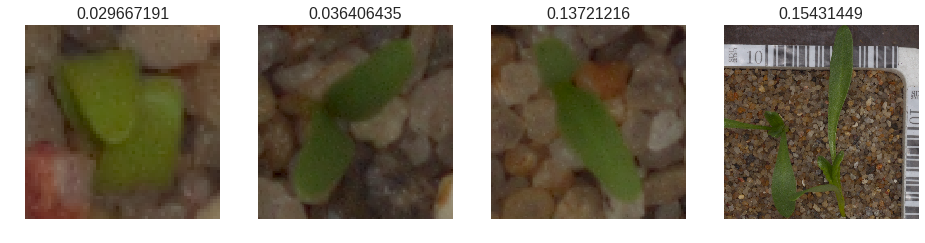

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


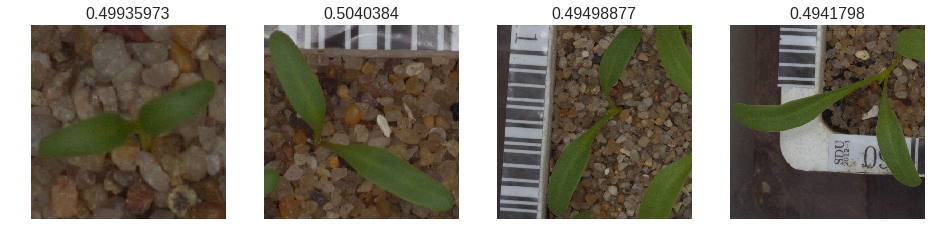

In [0]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Choosing a learning rate

The *learning rate* determines how quickly or how slowly you want to update the *weights* (or *parameters*). Learning rate is one of the most difficult parameters to set, because it significantly affects model performance.

The method `learn.lr_find()` helps you find an optimal learning rate. It uses the technique developed in the 2015 paper [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186), where we simply keep increasing the learning rate from a very small value, until the loss stops decreasing. We can plot the learning rate across batches to see what this looks like.

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model.

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      0.830659   0.525607   0.83      



Our `learn` object contains an attribute `sched` that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

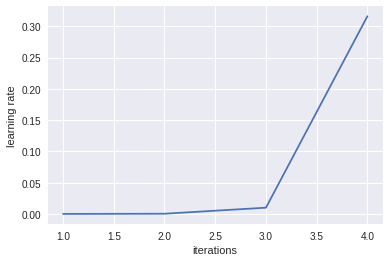

In [0]:
learn.sched.plot_lr()

Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/batch_size) iterations of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing:

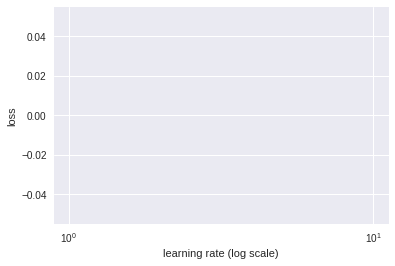

In [0]:
learn.sched.plot()

The loss is still clearly improving at lr=1e-2 (0.01), so that's what we use. Note that the optimal learning rate can change as we train the model, so you may want to re-run this function from time to time.

## Improving our model

### Data augmentation

If you try training for more epochs, you'll notice that we start to *overfit*, which means that our model is learning to recognize the specific images in the training set, rather than generalizing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

We can do this by passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`, with a list of functions to apply that randomly change the image however we wish. For photos that are largely taken from the side (e.g. most photos of dogs and cats, as opposed to photos taken from the top down, such as satellite imagery) we can use the pre-defined list of functions `transforms_side_on`. We can also specify random zooming of images up to specified scale by adding the `max_zoom` parameter.

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

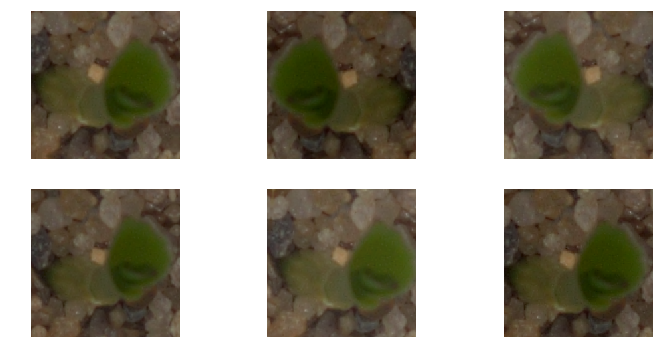

In [0]:
plots(ims, rows=2)

Let's create a new `data` object that includes this augmentation in the transforms.

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.752293   0.533009   0.735     



[array([0.53301]), 0.735]

In [0]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

In [0]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.460278   0.419407   0.835     
    1      0.436725   0.289139   0.95      
    2      0.377141   0.219134   0.945     



[array([0.21913]), 0.945]

What is that `cycle_len` parameter? What we've done here is used a technique called *stochastic gradient descent with restarts (SGDR)*, a variant of *learning rate annealing*, which gradually decreases the learning rate as training progresses. This is helpful because as we get closer to the optimal weights, we want to take smaller steps.

However, we may find ourselves in a part of the weight space that isn't very resilient - that is, small changes to the weights may result in big changes to the loss. We want to encourage our model to find parts of the weight space that are both accurate and stable. Therefore, from time to time we increase the learning rate (this is the 'restarts' in 'SGDR'), which will force the model to jump to a different part of the weight space if the current area is "spikey". Here's a picture of how that might look if we reset the learning rates 3 times (in this paper they call it a "cyclic LR schedule"):

<img src="images/sgdr.png" width="80%">
(From the paper [Snapshot Ensembles](https://arxiv.org/abs/1704.00109)).

The number of epochs between resetting the learning rate is set by `cycle_len`, and the number of times this happens is refered to as the *number of cycles*, and is what we're actually passing as the 2nd parameter to `fit()`. So here's what our actual learning rates looked like:

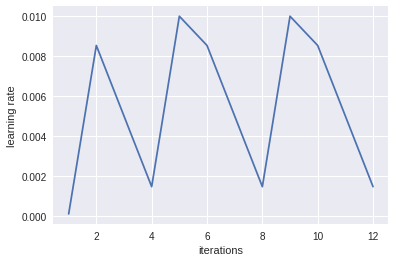

In [0]:
learn.sched.plot_lr()

Our validation loss isn't improving much, so there's probably no point further training the last layer on its own.

Since we've got a pretty good model at this point, we might want to save it so we can load it again later without training it from scratch.

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

### Fine-tuning and differential learning rate annealing

Now that we have a good final layer trained, we can try fine-tuning the other layers. To tell the learner that we want to unfreeze the remaining layers, just call (surprise surprise!) `unfreeze()`.

In [0]:
learn.unfreeze()

Note that the other layers have *already* been trained to recognize imagenet photos (whereas our final layers where randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we've seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before. We refer to this as *differential learning rates*, although there's no standard name for this techique in the literature that we're aware of.

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [0]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.56911    0.208267   0.96      
    1      0.449949   0.253914   0.89      
    2      0.388819   0.252453   0.895     
    3      0.355896   0.193355   0.92      
    4      0.313415   0.152049   0.945     
    5      0.27997    0.141681   0.945     
    6      0.259103   0.141248   0.945     



[array([0.14125]), 0.945]

Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

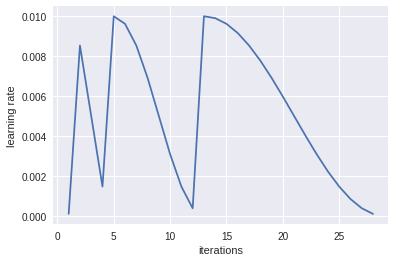

In [0]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [0]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [0]:
accuracy_np(probs, y)

0.965

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

## Analyzing results

### Confusion matrix 

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[96  4]
 [ 3 97]]


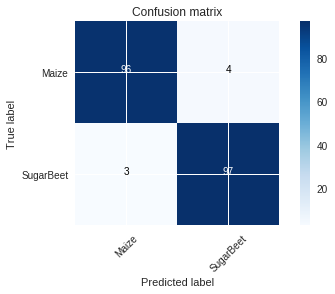

In [0]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

Most incorrect cats


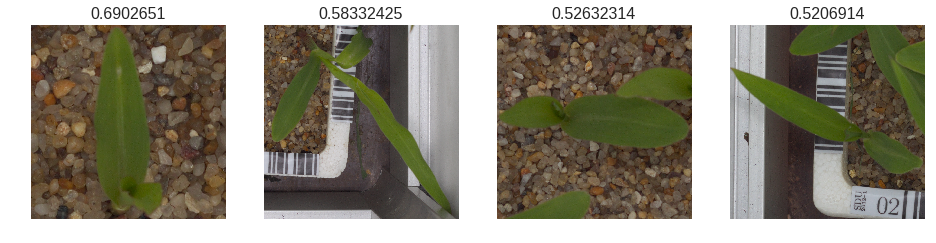

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


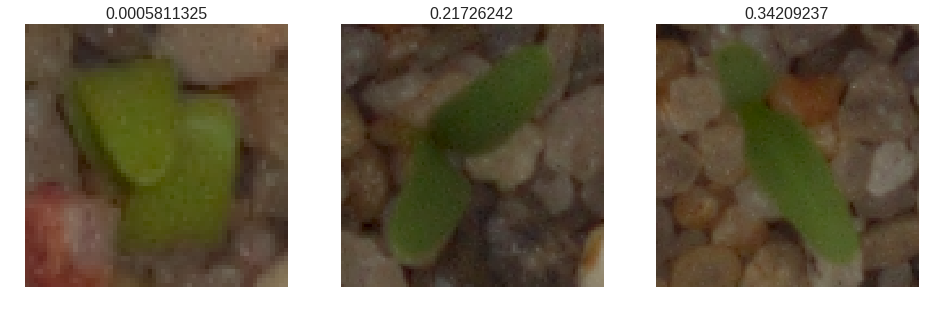

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

## Review: easy steps to train a world-class image classifier

1. precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

## Understanding the code for our first model

Let's look at the Dogs v Cats code line by line.

**tfms** stands for *transformations*. `tfms_from_model` takes care of resizing, image cropping, initial normalization (creating data with (mean,stdev) of (0,1)), and more.

In [0]:
tfms = tfms_from_model(resnet34, sz)

We need a <b>path</b> that points to the dataset. In this path we will also store temporary data and final results. `ImageClassifierData.from_paths` reads data from a provided path and creates a dataset ready for training.

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

`ConvLearner.pretrained` builds *learner* that contains a pre-trained model. The last layer of the model needs to be replaced with the layer of the right dimensions. The pre-trained model was trained for 1000 classes therfore the final layer predicts a vector of 1000 probabilities. The model for cats and dogs needs to output a two dimensional vector. The diagram below shows in an example how this was done in one of the earliest successful CNNs. The layer "FC8" here would get replaced with a new layer with 2 outputs.

<img src="images/pretrained.png" width="500">
[original image](https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg)

In [0]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

*Parameters*  are learned by fitting a model to the data. *Hyperparameters* are another kind of parameter, that cannot be directly learned from the regular training process. These parameters express “higher-level” properties of the model such as its complexity or how fast it should learn. Two examples of hyperparameters are the *learning rate* and the *number of epochs*.

During iterative training of a neural network, a *batch* or *mini-batch* is a subset of training samples used in one iteration of Stochastic Gradient Descent (SGD). An *epoch* is a single pass through the entire training set which consists of multiple iterations of SGD.

We can now *fit* the model; that is, use *gradient descent* to find the best parameters for the fully connected layer we added, that can separate cat pictures from dog pictures. We need to pass two hyperparameters: the *learning rate* (generally 1e-2 or 1e-3 is a good starting point, we'll look more at this next) and the *number of epochs* (you can pass in a higher number and just stop training when you see it's no longer improving, then re-run it with the number of epochs you found works well.)

In [0]:
learn.fit(1e-2, 1)

## Analyzing results: loss and accuracy

When we run `learn.fit` we print 3 performance values (see above.) Here 0.03 is the value of the **loss** in the training set, 0.0226 is the value of the loss in the validation set and 0.9927 is the validation accuracy. What is the loss? What is accuracy? Why not to just show accuracy?

**Accuracy** is the ratio of correct prediction to the total number of predictions.

In machine learning the **loss** function or cost function is representing the price paid for inaccuracy of predictions.

The loss associated with one example in binary classification is given by:
`-(y * log(p) + (1-y) * log (1-p))`
where `y` is the true label of `x` and `p` is the probability predicted by our model that the label is 1.

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [0]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

Note that in our toy example above our accuracy is 100% and our loss is 0.16. Compare that to a loss of 0.03 that we are getting while predicting cats and dogs. Exercise: play with `preds` to get a lower loss for this example. 

**Example:** Here is an example on how to compute the loss for one example of binary classification problem. Suppose for an image x with label 1 and your model gives it a prediction of 0.9. For this case the loss should be small because our model is predicting a label $1$ with high probability.

`loss = -log(0.9) = 0.10`

Now suppose x has label 0 but our model is predicting 0.9. In this case our loss should be much larger.

loss = -log(1-0.9) = 2.30

- Exercise: look at the other cases and convince yourself that this make sense.
- Exercise: how would you rewrite `binary_loss` using `if` instead of `*` and `+`?

Why not just maximize accuracy? The binary classification loss is an easier function to optimize.